# Import Notebook

In [1]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

# Gather Data

[More Information](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/)

In [2]:
boston_dataset=load_boston()

In [3]:
type(boston_dataset)

sklearn.utils.Bunch

In [4]:
# boston_dataset

In [5]:
dir(boston_dataset)

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [6]:
# print(boston_dataset.DESCR)

# Data points and features

In [7]:
boston_dataset.data.shape

(506, 13)

In [8]:
boston_dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [9]:
# Actual prices in thousands
boston_dataset.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

Data exploration with Pandas

In [10]:
# create dataframe from dataset
data=pd.DataFrame(data=boston_dataset.data, columns=boston_dataset.feature_names)

# Add Column with the price (target)

data['PRICE'] = boston_dataset.target

In [11]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [12]:
data.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [13]:
data.count()

CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
PRICE      506
dtype: int64

## Cleaning Data check for missing values

In [14]:
pd.isnull(data).any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
PRICE      False
dtype: bool

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


## Visualising Data - Histograms, Distributions and Bar Charts

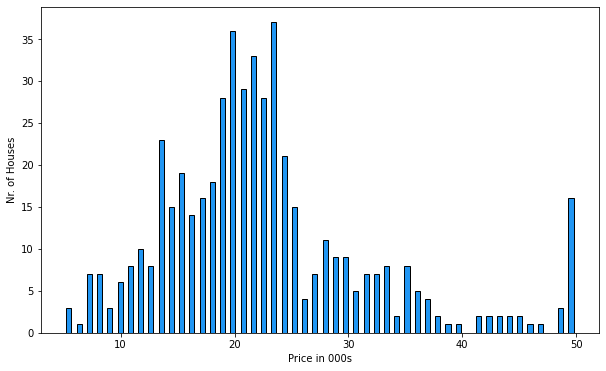

In [16]:
plt.figure(figsize=(10, 6))
plt.hist(data['PRICE'], bins=50, ec='black', color='#2196f3',rwidth=0.5)
plt.xlabel('Price in 000s')
plt.ylabel('Nr. of Houses')
plt.show()

In [17]:
data['PRICE'].value_counts()

50.0    16
25.0     8
21.7     7
22.0     7
23.1     7
        ..
14.2     1
26.7     1
32.9     1
39.8     1
9.7      1
Name: PRICE, Length: 229, dtype: int64

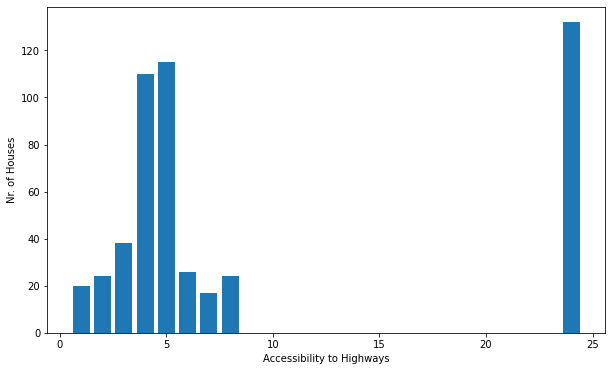

In [18]:
frequency = data['RAD'].value_counts()
#type(frequency)
#frequency.index
#frequency.axes[0]
plt.figure(figsize=(10, 6))
plt.xlabel('Accessibility to Highways')
plt.ylabel('Nr. of Houses')
plt.bar(frequency.index, height=frequency)
plt.show()

## Correlation

## $$ \rho _{XY} = corr(X,Y)$$
## $$ -1.0 \leq \rho _{XY} \leq +1.0 $$

In [19]:
data['PRICE'].corr(data['RM'])

0.6953599470715396

In [20]:
data['PRICE'].corr(data['PTRATIO'])

-0.5077866855375618

In [21]:
data.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


# Hide the duplicated Values from Corr Table:

## Create a Mask to select our Data:

In [22]:
mask=np.zeros_like(data.corr())
triangle_indices=np.triu_indices_from(mask)
# print(triangle_indices)
mask[triangle_indices]= True
# mask

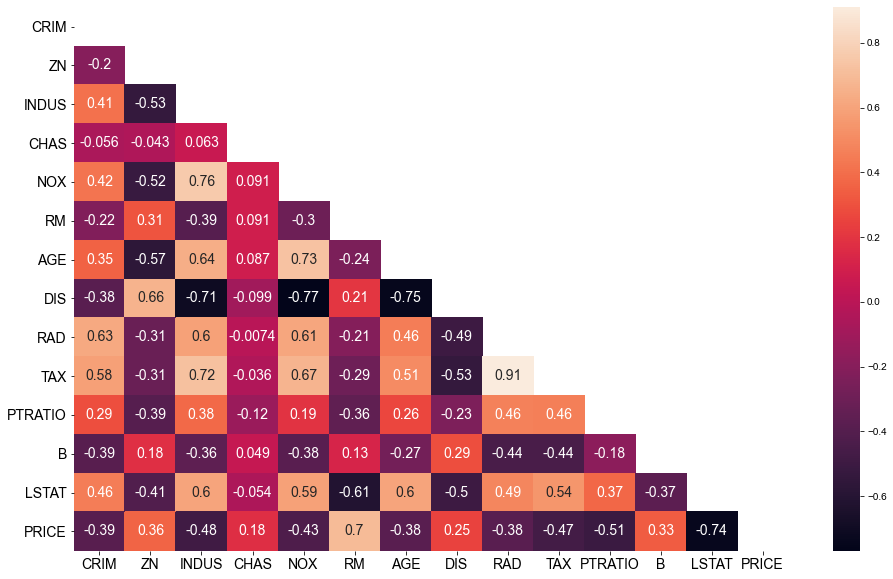

In [23]:
plt.figure(figsize=(16, 10))
sns.heatmap(data.corr(), mask=mask, annot=True, annot_kws={"size":14})
sns.set_style('white')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

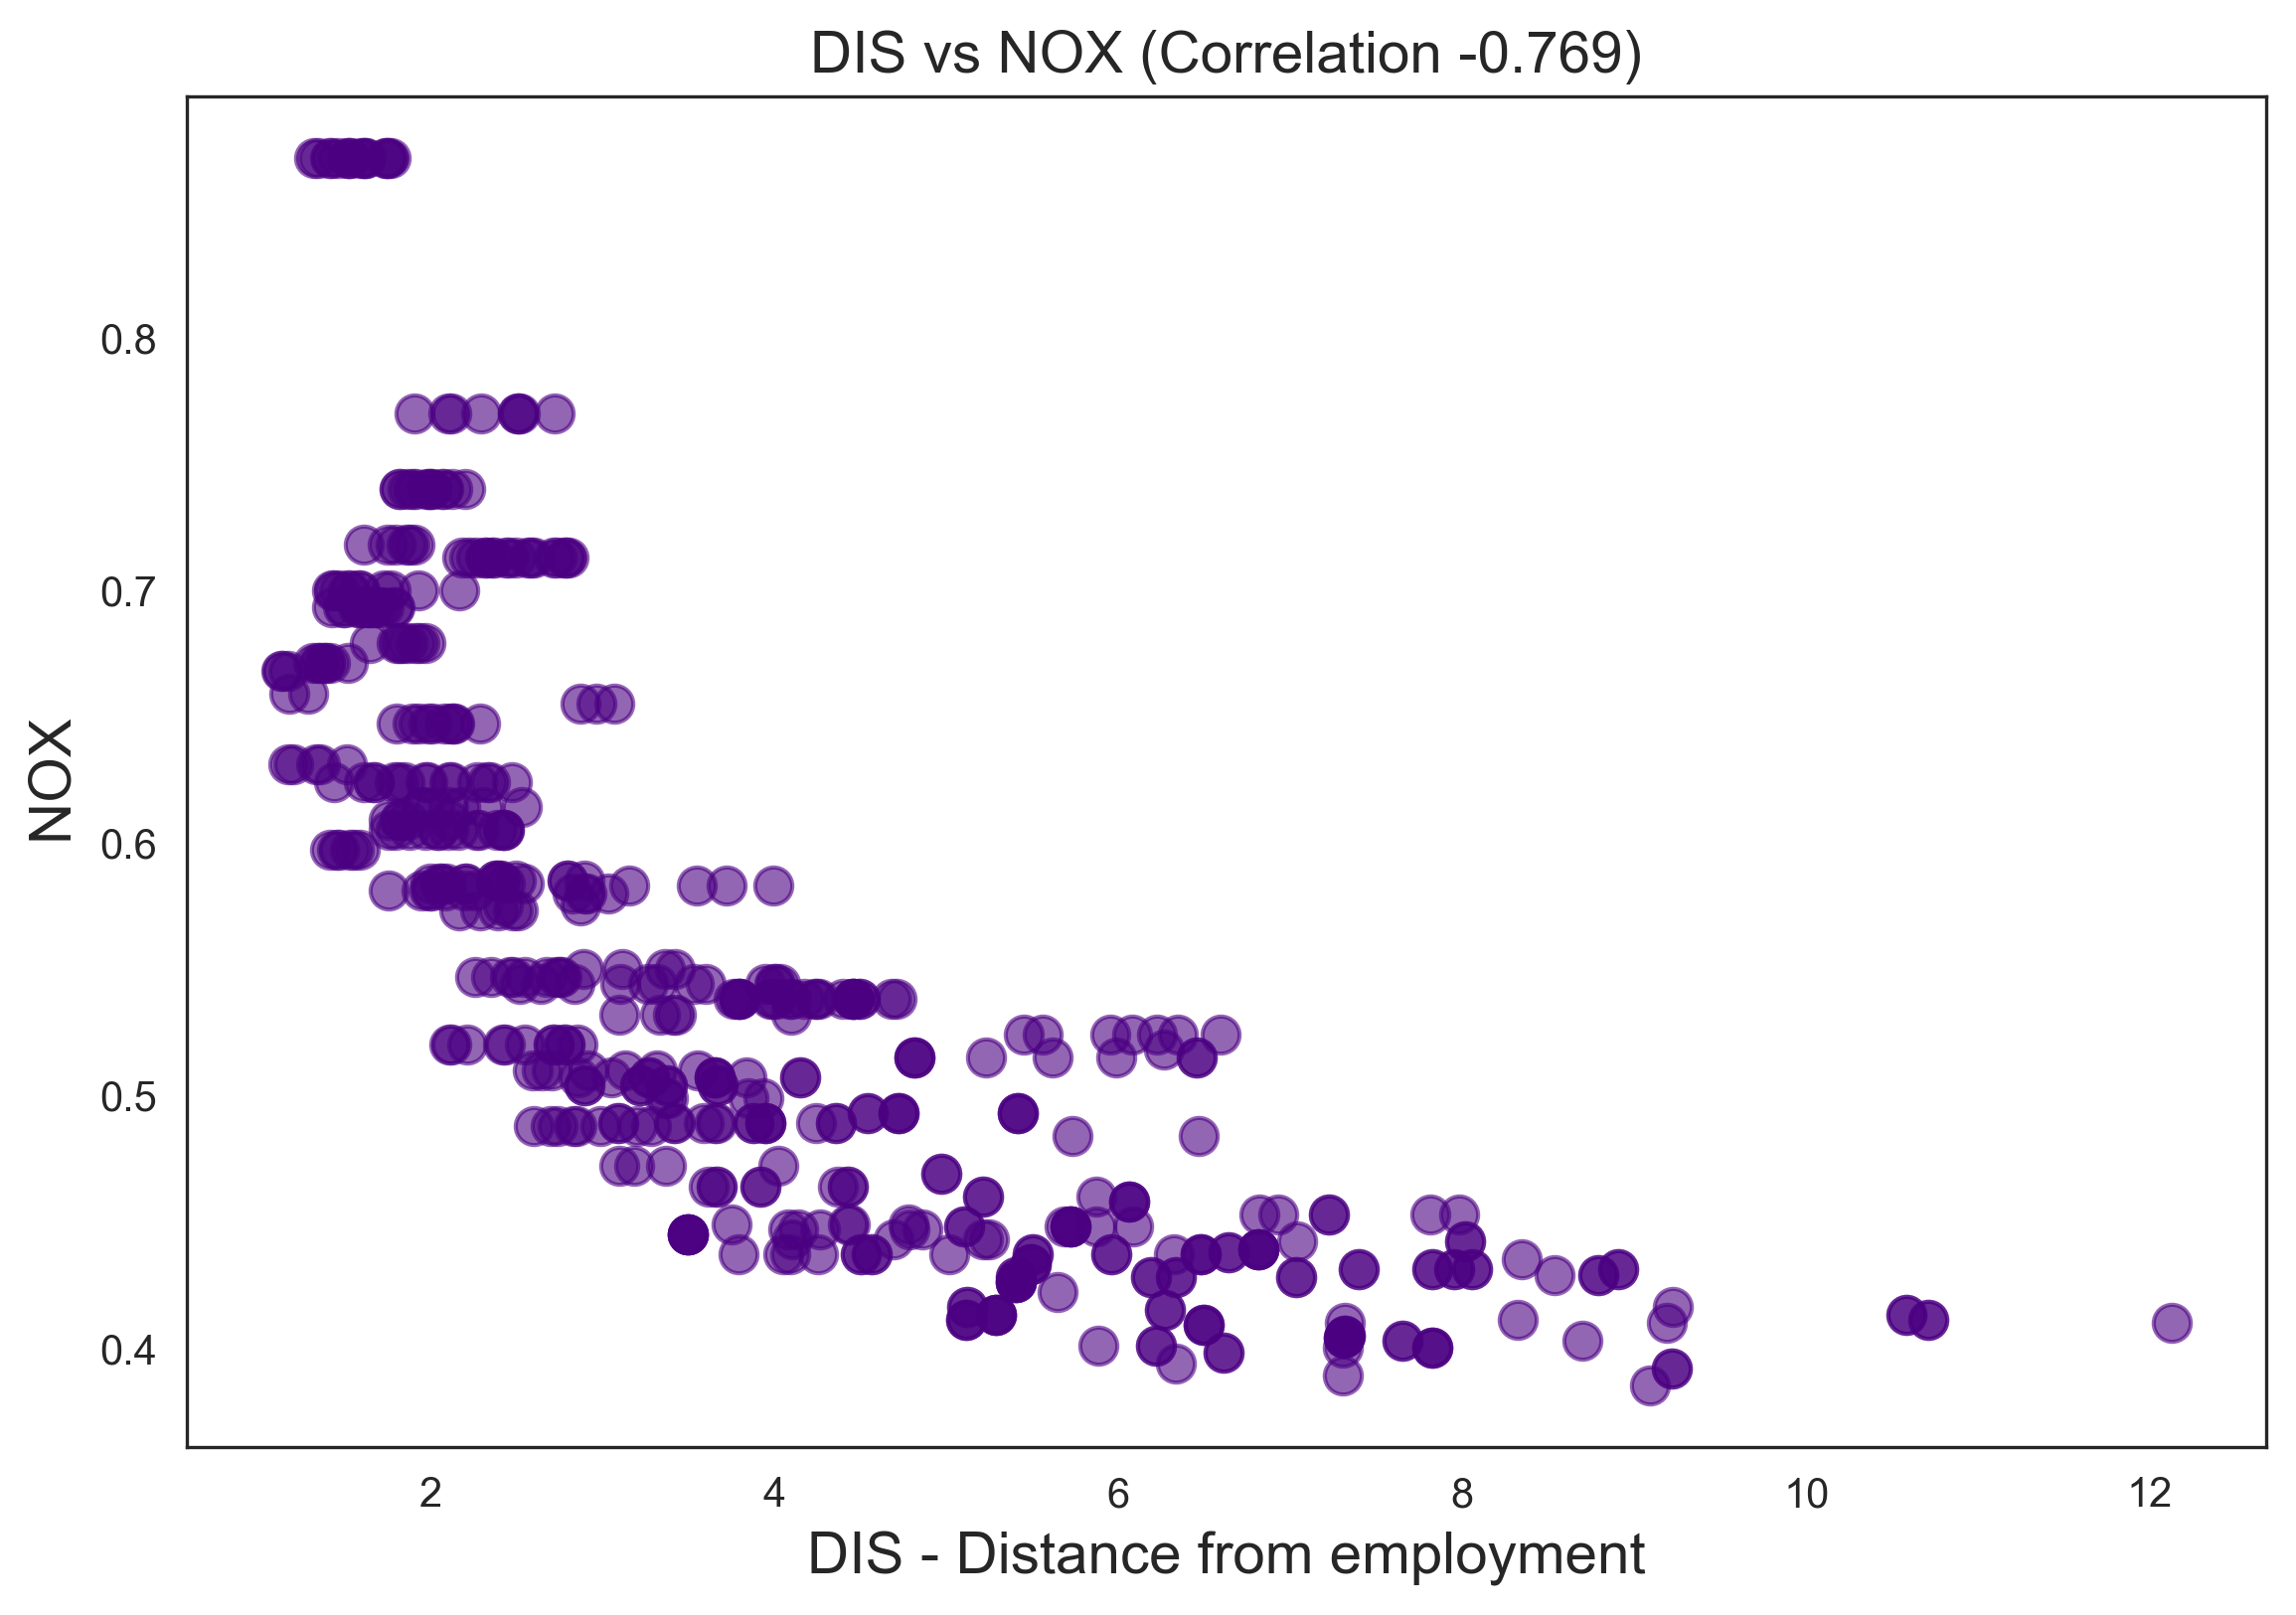

In [24]:
nox_dis_corr = round(data['NOX'].corr(data['DIS']), 3)

plt.figure(figsize=(9, 6), dpi=300)
plt.scatter(x=data['DIS'], y=data['NOX'],alpha=0.6, s=80, color='indigo')
plt.title(f'DIS vs NOX (Correlation {nox_dis_corr})', fontsize=14)
plt.xlabel("DIS - Distance from employment", fontsize=14)
plt.ylabel("NOX ", fontsize=14)
plt.show()

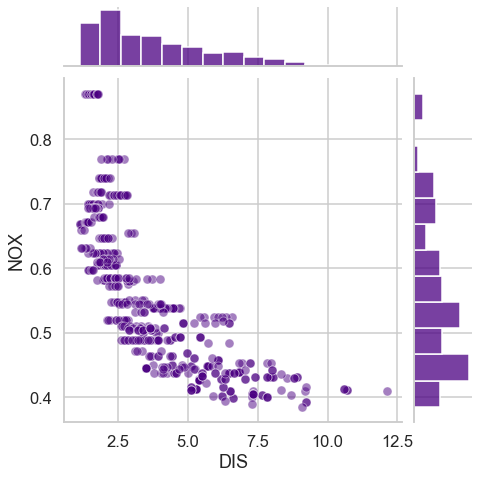

In [25]:
sns.set()
sns.set_context('talk') # clear the font and size to more readable
sns.set_style('whitegrid')
sns.jointplot(x=data['DIS'], y=data['NOX'], height=7, color='indigo', joint_kws={'alpha':0.5})
plt.show()

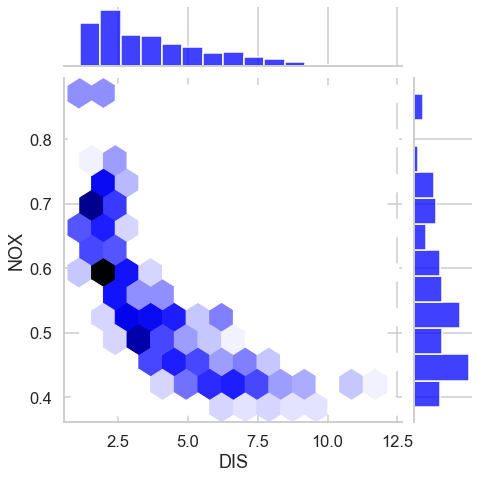

In [26]:
sns.set()
sns.set_context('talk')
sns.set_style('whitegrid')
sns.jointplot(x=data['DIS'], y=data['NOX'], kind='hex', height=7, color='blue')
plt.show()

In [133]:
dataset=pd.read_excel("compact.xlsx").fillna(0)

In [134]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [135]:
target=dataset['target']
# dataset['target'].isnull().values.any()
# target=scaler.transform(target)
# print(scaler.fit(target))

In [136]:
# features=dataset.drop(["target","name_at_End","name",'delta0ch0','delta1ch1',"delta2ch2","delta3ch3"], axis=1).fillna(0)
features=dataset.drop(["target","name"], axis=1).fillna(0)
# features.isnull().values.any()
# print(features.head())
# features=scaler.transform(features)
# print(features)
# print(scaler.fit(features))
# print(scaler.transform(features))
for x in features.columns:
    if "Unnamed" in x:
        features=features.drop(columns=x)
print(features.columns)
features.to_excel("featurelars.xlsx")

Index(['vpp0ch0', 'delta0ch0', 'vpp1ch1', 'delta1ch1', 'vpp2ch2', 'delta2ch2',
       'vpp3ch3', 'delta3ch3', 'delta4ch4', 'delta5ch5', 'delta6ch6',
       'delta7ch7', 'delta8ch8', 'VR1', 'VR5'],
      dtype='object')


In [137]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=10)
# % of training set
len(X_train)/len(features)

0.8

In [138]:
X_train.head()

,vpp0ch0,delta0ch0,vpp1ch1,delta1ch1,vpp2ch2,delta2ch2,vpp3ch3,delta3ch3,delta4ch4,delta5ch5,delta6ch6,delta7ch7,delta8ch8,VR1,VR5
39,3892680,1788444,1812220.0,839520,732960,334080,415620,178740,2632320,6844860,674280,1594260,1643580,648,1588
2,3939840,1844208,1780200.0,843660,756540,349668,388620,176148,2587680,6583140,623880,1522440,1550880,654,1920
40,3900600,1806624,1764720.0,819180,756540,344520,387180,179640,2694240,6542280,648720,1525500,1609200,640,1960
32,3906180,1833768,1806660.0,846468,758700,357912,402660,211644,2631240,6110100,672300,1596420,1644480,599,1976
10,3539700,1659780,1641240.0,768960,806220,365184,434160,198648,2331000,5343300,543600,1316700,1351800,589,2212


In [139]:
# % of test data set
X_test.shape[0]/features.shape[0]

0.2

In [140]:
regr = LinearRegression()
regr.fit(X_train, y_train)
#Challenge: print out r-squared for training and test datasets
print('Training data r-squared:', regr.score(X_train, y_train))
print('Test data r-squared:', regr.score(X_test, y_test))

print('Intercept', regr.intercept_)
coeff=regr.coef_
coeff_names=X_train.columns
pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['coef'])

Training data r-squared: 0.9953435692419653
Test data r-squared: 0.9864720455483709
Intercept -29.19420690608109


,coef
vpp0ch0,2.334869e-06
delta0ch0,5.938101e-06
vpp1ch1,2.227177e-07
delta1ch1,-2.209204e-05
vpp2ch2,-1.507952e-05
delta2ch2,8.575160e-06
vpp3ch3,2.127438e-05
delta3ch3,5.480584e-05
delta4ch4,2.027207e-06
delta5ch5,1.538630e-07


In [142]:
# coeff

In [68]:
# regr.predict()

In [148]:
testx=pd.read_excel("test3.xlsx")
# xtarget=testx['target']
# xdata=testx.drop(columns=["name","target"]).fillna(0)
# xdata=testx.drop(columns=["name"]).fillna(0)
# print(testx.head())

In [149]:
# X_train, X_test, y_train, y_test = train_test_split(xdata, xtarget, test_size=0.2, random_state=10)
# # % of training set
# len(X_train)/len(features)
# # print(X_test.head())

In [150]:
regr.predict(testx)

array([4.84471359])

In [132]:
# regr.summary()